In [981]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict,StratifiedShuffleSplit
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,log_loss,make_scorer
from sklearn.multiclass import OneVsOneClassifier,OneVsRestClassifier
from sklearn.linear_model import LinearRegression,LogisticRegression,SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [982]:
train=pd.read_csv(r'C:\Users\Rahul\Desktop\MachineHack-metalfurnace-classification\Train.csv')
test=pd.read_csv(r'C:\Users\Rahul\Desktop\MachineHack-metalfurnace-classification\Test.csv')

In [917]:
train['New']=train['f21']+train['f20']+train['f25']
test['New']=test['f21']+test['f20']+test['f25']

In [980]:
train[28].value_counts().count()

614

In [983]:
label=train['grade']
train.drop(columns=['grade'],inplace=True)

In [971]:
train.columns

Index(['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10',
       'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20',
       'f21', 'f22', 'f23', 'f24', 'f25', 'f26', 'f27'],
      dtype='object')

In [987]:
mm=MinMaxScaler()
train=pd.DataFrame(mm.fit_transform(train))
test=pd.DataFrame(mm.fit_transform(test))

In [988]:
train.head()

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,0.857143,0.0,0.0,1.0,1.0,0.442857,1.0,1.0,1.0,0.0,...,1.0,1.0,0.0,0.360000,0.400000,0.000000,1.0,0.833333,1.0,0.898644
1,0.000000,0.0,1.0,0.0,1.0,0.000000,1.0,1.0,1.0,0.0,...,1.0,1.0,0.0,0.200267,0.399934,0.000000,1.0,0.000000,1.0,0.625029
2,0.857143,0.0,0.0,1.0,1.0,0.442857,1.0,1.0,1.0,0.0,...,1.0,1.0,1.0,0.600267,0.836066,1.000000,1.0,0.000000,1.0,0.994725
3,0.428571,0.0,0.0,1.0,0.5,0.000000,1.0,1.0,1.0,0.0,...,1.0,1.0,1.0,0.253333,0.399934,0.854508,1.0,0.000000,1.0,0.465755
4,0.000000,0.0,0.0,1.0,0.5,0.000000,1.0,1.0,1.0,0.0,...,1.0,1.0,1.0,0.119733,0.196787,1.000000,1.0,0.000000,1.0,0.416692


In [890]:
train.columns

RangeIndex(start=0, stop=29, step=1)

In [984]:
t2=pd.Series(np.mean(train,axis=1))
t3=pd.Series(np.median(train,axis=1))
t4=pd.Series(np.max(train,axis=1))
t5=pd.Series(np.min(train,axis=1))

t7=pd.Series(np.mean(test,axis=1))
t8=pd.Series(np.median(test,axis=1))
t9=pd.Series(np.max(test,axis=1))
t10=pd.Series(np.min(test,axis=1))

In [985]:
train['Avg']=t2
#train['Med']=t3
#train['Max']=t4
#train['Min']=t5

test['Avg']=t7
#test['Med']=t8
#test['Max']=t9
#test['Min']=t10

In [986]:
train.head()

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f19,f20,f21,f22,f23,f24,f25,f26,f27,Avg
0,1.848564,-0.26425,-0.461423,0.409400,1.305455,2.329398,0.370965,0.090167,0.107958,0.0,...,0.085505,0.233285,-1.080663,0.443257,-0.406121,-0.687687,0.271886,3.727218,0.102129,0.391212
1,-0.825098,-0.26425,3.032397,-2.442599,1.305455,-0.276144,0.370965,0.090167,0.107958,0.0,...,0.085505,0.233285,-1.080663,-0.232546,-0.406366,-0.687687,0.271886,-0.232472,0.102129,0.060029
2,1.848564,-0.26425,-0.461423,0.409400,1.305455,2.329398,0.370965,0.090167,0.107958,0.0,...,0.085505,0.233285,0.925358,1.459782,1.221876,1.877777,0.271886,-0.232472,0.102129,0.507509
3,0.511733,-0.26425,-0.461423,0.409400,-0.525726,-0.276144,0.370965,0.090167,0.107958,0.0,...,0.085505,0.233285,0.925358,-0.008030,-0.406366,1.504523,0.271886,-0.232472,0.102129,-0.132757
4,-0.825098,-0.26425,-0.461423,0.409400,-0.525726,-0.276144,0.370965,0.090167,0.107958,0.0,...,0.085505,0.233285,0.925358,-0.573268,-1.164793,1.877777,0.271886,-0.232472,0.102129,-0.192142


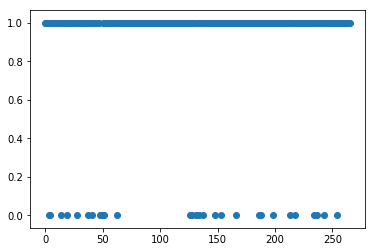

In [894]:
plt.scatter(range(len(test)),test[6])

In [989]:
train=pd.concat([pd.get_dummies(train[[0,4,6,8,10,11,12,13,14,15,16,18,20,25]].astype('category')),train],axis=1)
test=pd.concat([pd.get_dummies(test[[0,4,6,8,10,11,12,13,14,15,16,18,20,25]].astype('category')),test],axis=1)

In [990]:
#pd.get_dummies(train[['f2']].astype('category'))
#train=pd.concat([pd.get_dummies(train[['f0','f3','f4','f6','f7','f8','f10','f11','f12','f13','f14','f15','f16','f18','f20','f21','f25','f26']].astype('category')),train],axis=1)
#test=pd.concat([pd.get_dummies(test[['f0','f3','f4','f6','f7','f8','f10','f11','f12','f13','f14','f15','f16','f18','f20','f21','f25','f26']].astype('category')),test],axis=1)

In [991]:
#train['f10'].value_counts().count()

In [993]:
test.shape

(266, 67)

In [872]:
#f8,f9,f15,f17,f19,f27

In [938]:
train.drop(columns=[8,9,11,19,25,26,27],inplace=True)
test.drop(columns=[8,9,11,19,25,26,27],inplace=True)

In [874]:
train.index

RangeIndex(start=0, stop=620, step=1)

In [875]:
#train.drop(columns=['f0','f2','f3','f4','f5','f6','f7','f8','f9','f19','f10','f11','f12','f13','f14','f15','f16','f18','f20','f21','f25','f26','f27'],inplace=True)
#test.drop(columns=['f0','f2','f3','f4','f5','f6','f7','f8','f9','f19','f10','f11','f12','f13','f14','f15','f16','f18','f20','f21','f25','f26','f27'],inplace=True)

In [940]:
train.shape

(620, 22)

In [994]:
label = label.astype('int')

In [995]:
def loss(y_pred,y_true, eps = 1e-30):
    y_pred = np.clip(y_pred,eps,1-eps)
    return (-(y_true * np.log(y_pred)).sum(axis=1).mean())

In [800]:
l=list()
l=[DecisionTreeClassifier(random_state=50),RandomForestClassifier(random_state=50),SVC(probability=True),AdaBoostClassifier(random_state=50),GradientBoostingClassifier(random_state=50),ExtraTreesClassifier(random_state=9)]

In [998]:
%%time
w=0
final=list()
import warnings
warnings.filterwarnings(action='ignore')

def splitting(m, train= train, label = label, test = test, random_state = 9):
    a = list()
    sss=StratifiedShuffleSplit(random_state= random_state,test_size=0.2,n_splits=5)
    for tr_index, te_index in sss.split(train,label):
        xtrain, xtest = train.loc[tr_index,:], train.loc[te_index,:]
        ytrain, ytest = label[tr_index], label[te_index]   
        m.fit(xtrain,ytrain)
        p = m.predict_proba(xtest)
        a.append(loss(p,pd.get_dummies(ytest).values))
    #pd.Series(m.feature_importances_, index = train.columns).sort_values(ascending=True).plot.barh()
    print(np.mean(a))
    return(pd.DataFrame(m.predict_proba(test)))

Wall time: 0 ns


In [1010]:
splitting(SVC(C=7,probability=True),random_state=40).head()

0.2885530670492064


,0,1,2,3,4
0,0.001199,0.018018,0.968559,0.006131,0.006092
1,0.009659,0.020019,0.010979,0.948825,0.010518
2,0.002370,0.006770,0.982167,0.002773,0.005920
3,0.016217,0.004244,0.005701,0.957175,0.016663
4,0.002893,0.005695,0.966522,0.023292,0.001598


In [1001]:
splitting(LogisticRegression(multi_class="multinomial",solver='lbfgs',C=10),random_state=300).head()

0.23984141756564986


,0,1,2,3,4
0,0.000043,5.083626e-03,0.993872,0.000368,0.000633
1,0.000538,3.898896e-03,0.067068,0.928349,0.000147
2,0.000950,2.653842e-03,0.991833,0.001658,0.002906
3,0.000441,1.499863e-07,0.001618,0.997698,0.000244
4,0.000427,5.495301e-04,0.910666,0.088344,0.000013


In [1017]:
%%time
plt.figure(figsize=(9,15))
a=splitting(GradientBoostingClassifier(n_estimators=100),random_state=40)

0.09064669604550941
Wall time: 2.55 s


<Figure size 648x1080 with 0 Axes>

In [1014]:
splitting(KNeighborsClassifier(),random_state=200).head()

1.2372805881829896


,0,1,2,3,4
0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0


In [1015]:
splitting(RandomForestClassifier(), random_state=150).head()

0.4985517708810754


,0,1,2,3,4
0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.1,0.9,0.0
2,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0


In [39]:
#'f9','f25','f11','f20','f26','f27','f3','f12','f13'

In [1018]:
a.to_excel('SSubmit.xlsx',index=False)

In [ ]:
final=pd.DataFrame(m.predict_proba(test))

In [ ]:
f.to_excel('sdubmit.xlsx',index=False)

In [ ]:
f = final[1]